In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
import lightgbm
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR

from imblearn.over_sampling import SMOTE

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Stratified CV
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)

In [3]:
#kFold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [59]:
#Metircs
def metrics(model, data, target):
    output_list = []
    accuracy = cross_val_score(model, data, target, cv=skf, scoring = 'accuracy', error_score = 'raise').mean()
    precision = cross_val_score(model, data, target, cv=skf, scoring = 'precision_macro', error_score = 'raise').mean()
    recall = cross_val_score(model, data, target, cv=skf, scoring = 'recall_macro', error_score = 'raise').mean()
    f1 = cross_val_score(model, data, target, cv=skf, scoring = 'f1_macro', error_score = 'raise').mean()
    balanced = cross_val_score(model, data, target, cv=skf, scoring = 'balanced_accuracy', error_score = 'raise').mean()
    return accuracy, precision, recall, f1, balanced
#     print(f'Accuracy : \t\t{accuracy}')
#     print(f'Precision : \t\t{precision}')
#     print(f'Recall : \t\t{recall}')
#     print(f'F1 : \t\t\t{f1}')
#     print(f'Balanced Accuracy : \t{balanced}')

In [60]:
#Metircs
def Rmetrics(model, data, target):
    output_list = []
    accuracy = cross_val_score(model, data, target, cv=kfold, scoring = 'accuracy', error_score = 'raise').mean()
    precision = cross_val_score(model, data, target, cv=kfold, scoring = 'precision_macro', error_score = 'raise').mean()
    recall = cross_val_score(model, data, target, cv=kfold, scoring = 'recall_macro', error_score = 'raise').mean()
    f1 = cross_val_score(model, data, target, cv=kfold, scoring = 'f1_macro', error_score = 'raise').mean()
    balanced = cross_val_score(model, data, target, cv=kfold, scoring = 'balanced_accuracy', error_score = 'raise').mean()
    return accuracy, precision, recall, f1, balanced
#     print(f'Accuracy : \t\t{accuracy}')
#     print(f'Precision : \t\t{precision}')
#     print(f'Recall : \t\t{recall}')
#     print(f'F1 : \t\t\t{f1}')
#     print(f'Balanced Accuracy : \t{balanced}')

In [6]:
#MinMaxScaler
def minMax(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    scale = scaler.transform(data)

    scaled_df = pd.DataFrame(scale)
    
    return scaled_df

In [7]:
#SMOTE
def smote(data, target):
    smote = SMOTE(random_state=0)
    X_over, y_over = smote.fit_resample(data, target)
    return X_over, y_over

----

### Logistic Regression

In [37]:
#LogisticRegression
def lr_increaseC(data, target):
    print('[Logistic Regression]')
    output_list = []
    for i in [1,2,4,8,16,32,64,128]:
        print(f'Cost Function: {i}')
        model = LogisticRegression(C=i)
        accuracy, precision, recall, f1, balanced = metrics(model, data, target)
        output_list.append([i, accuracy, precision, recall, f1, balanced])
    df = pd.DataFrame(output_list)
    return df

### LGBM

In [38]:
#LGBM for Binary
def Blgbm_increaseTree(data, target):
    print('[LGBM Classifier]')
    output_list=[]
    for i in [0.1, 0.05, 0.01]:
        for j in range(10):
            tree = (j+1) * 100
            print(f'Learning Rate: {i}')
            print(f'Tree: {tree}')
#             param = {'max_depth': -1, 'num_leaves': 31, 'objective': 'binary', 'num_iterations': (j+1) * 100, 'learning_rate': i}
#             param['metric'] = 'binary_logloss'
#             num_round = 5
#             bst = lgb.cv(param, data, num_round, nfold=5)
#             print(bst)
            model = LGBMClassifier(n_estimators= tree, learning_rate= i)
            accuracy, precision, recall, f1, balanced = metrics(model, data, target)
            output_list.append([i, tree, accuracy, precision, recall, f1, balanced])
    df = pd.DataFrame(output_list)
    return df

In [39]:
#LGBM for Multiclass
def Mlgbm_increaseTree(data, target):
    print('[LGBM Classifier]')
    output_list=[]
    for i in [0.1, 0.05, 0.01]:
        for j in range(10):
            tree = (j+1) * 100
            print(f'Learning Rate: {i}')
            print(f'Tree: {tree}')
#             param = {'max_depth': -1, 'num_leaves': 31, 'objective': 'multiclass', 'num_iterations': (j+1) * 100, 'learning_rate': i}
#             param['metric'] = 'multi_logloss'
#             num_round = 5
#             bst = lgb.cv(param, data, num_round, nfold=5)
#             print(bst)
            model = LGBMClassifier(n_estimators= tree, learning_rate= i)
            accuracy, precision, recall, f1, balanced = metrics(model, data, target)
            output_list.append([i, tree, accuracy, precision, recall, f1, balanced])
    df = pd.DataFrame(output_list)
    return df         

In [40]:
#LGBM for Regression
def Rlgbm_increaseTree(data, target):
    print('[LGBM Classifier]')
    output_list=[]
    for i in [0.1, 0.05, 0.01]:
        for j in range(10):
            tree = (j+1) * 100
            print(f'Learning Rate: {i}')
            print(f'Tree: {tree}')
#             param = {'max_depth': -1, 'num_leaves': 31, 'num_iterations': (j+1) * 100, 'learning_rate': i}
#             param['metric'] = 'cross_entropy'
#             num_round = 5
#             bst = lgb.cv(param, data, num_round, nfold=5)
#             print(bst)
            model = LGBMRegressor(n_estimators= tree, learning_rate= i)
            accuracy, precision, recall, f1, balanced = Rmetrics(model, data, target)
            output_list.append([i, tree, accuracy, precision, recall, f1, balanced])
    df = pd.DataFrame(output_list)
    return df          

### RandomForest

In [41]:
# RandomForestClassifier
def Crf_increaseTree(data, target):
    print('[RandomForest]')
    output_list=[]
    for j in range(10):
        tree = (j+1) * 100
        print(f'Tree: {tree}')
        model = RandomForestClassifier(n_estimators = tree, class_weight = 'balanced')
        accuracy, precision, recall, f1, balanced = metrics(model, data, target)
        output_list.append([tree, accuracy, precision, recall, f1, balanced])
    df = pd.DataFrame(output_list)
    return df          

In [42]:
# RandomForest Regressor of Regression
def Rrf_increaseTree(data, target):
    print('[RandomForest]')
    output_list=[]
    for j in range(10):
        tree = (j+1) * 100
        print(f'Tree: {tree}')
        model = RandomForestRegressor(n_estimators = tree)
        accuracy, precision, recall, f1, balanced = Rmetrics(model, data, target)
        output_list.append([tree, accuracy, precision, recall, f1, balanced])
    df = pd.DataFrame(output_list)
    return df                                      

### k-NN

In [43]:
#k-NN for Classification
def knnC_increaseK(data, target):
    print('[k-NN]')
    output_list=[]
    for i in [3,5,7]:
        print(f'k: {i}')
        model = KNeighborsClassifier(n_neighbors=i)
        accuracy, precision, recall, f1, balanced = metrics(model, data, target)
        output_list.append([i, accuracy, precision, recall, f1, balanced])
    df = pd.DataFrame(output_list)
    return df                                  

In [44]:
#k-NN for Regression
def knnR_increaseK(data, target):
    print('[k-NN]')
    output_list=[]
    for i in [3,5,7]:
        print(f'k: {i}')
        model = KNeighborsRegressor(n_neighbors=i)
        accuracy, precision, recall, f1, balanced = Rmetrics(model, data, target)
        output_list.append([i, accuracy, precision, recall, f1, balanced])
    df = pd.DataFrame(output_list)
    return df                            

### SVM

In [45]:
# #SVC - Classification
# def svc_increaseCGamma(data, target):
#     print('[SVM]')
#     output_list=[]
#     for i in [1,10,100]:
#         for j in [0.01,0.001,0.0001]:
#             print(f'Cost: {i}')
#             print(f'Gamma: {j}')
#             model = SVC(C=float(i), gamma=float(j))
#             accuracy, precision, recall, f1, balanced = metrics(model, data, target)
#             output_list.append([i, j, accuracy, precision, recall, f1, balanced])
#     df = pd.DataFrame(output_list)
#     return df                                        

In [46]:
# #SVR - Regression
# def svr_increaseCGamma(data, target):
#     print('[SVM]')
#     output_list=[]
#     for i in [1,10,100]:
#         for j in [0.01,0.001,0.0001]:
#             print(f'Cost: {i}')
#             print(f'Gamma: {j}')
#             model = SVR(C=i, gamma=j)
#             accuracy, precision, recall, f1, balanced = metrics(model, data, target)
#             output_list.append([i,j, accuracy, precision, recall, f1, balanced])
#     df = pd.DataFrame(output_list)
#     return df                                                  

----

In [47]:
#Start - Binary
def Brun_models(data, target, name, type):
    df_lr = lr_increaseC(data,target)
    df_lr.to_csv(f'./Metrics/{name}_lr_{type}.csv')
    del df_lr
    
    df_lgbm = Blgbm_increaseTree(data,target)
    df_lgbm.to_csv(f'./Metrics/{name}_lgbm_{type}.csv')
    del df_lgbm
    
    df_rf = Crf_increaseTree(data,target)
    df_rf.to_csv(f'./Metrics/{name}_rf_{type}.csv')
    del df_rf
    
    df_knn = knnC_increaseK(data,target)
    df_knn.to_csv(f'./Metrics/{name}_knn_{type}.csv')
    del df_knn
    
    df_svc = svc_increaseCGamma(data,target)
    df_svc.to_csv(f'./Metrics/{name}_svm_{type}.csv')
    del df_svc

In [64]:
#Start - Multi
def Mrun_models(data, target, name, type):
#     df_lr = lr_increaseC(data,target)
#     df_lr.to_csv(f'./Metrics/{name}_lr_{type}.csv')
#     del df_lr
    
#     df_lgbm = Mlgbm_increaseTree(data,target)
#     df_lgbm.to_csv(f'./Metrics/{name}_lgbm_{type}.csv')
#     del df_lgbm
    
    df_rf = Crf_increaseTree(data,target)
    df_rf.to_csv(f'./Metrics/{name}_rf_{type}.csv')
    del df_rf
    
    df_knn = knnC_increaseK(data,target)
    df_knn.to_csv(f'./Metrics/{name}_knn_{type}.csv')
    del df_knn
    
#     df_svm = svc_increaseCGamma(data,target)
#     df_svc.to_csv(f'./Metrics/{name}_svm_{type}.csv')
#     del df_svc

In [73]:
#Start - Regression
def Rrun_models(data, target, name, type):
#     df_lr = Rlr_increaseC(data,target)
#     df_lr.to_csv(f'./Metrics/{name}_lr_{type}.csv')
#     del df_lr
    
#     df_lgbm = Rlgbm_increaseTree(data,target)
#     df_lgbm.to_csv(f'./Metrics/{name}_lgbm_{type}.csv')
#     del df_lgbm
    
    df_rf = Rrf_increaseTree(data,target)
    df_rf.to_csv(f'./Metrics/{name}_rf_{type}.csv')
    del df_rf
    
    df_knn = knnR_increaseK(data,target)
    df_knn.to_csv(f'./Metrics/{name}_knn_{type}.csv')
    del df_knn
    
#     df_svm = svr_increaseCGamma(data,target)
#     df_svc.to_csv(f'./Metrics/{name}_svm_{type}.csv')
#     del df_svc

----

In [22]:
#Binary
def Binclude_processing(X, y, name):
    print('---------Basic---------')
    Brun_models(X,y, name, 'basic')
    
    print('---------MinMax---------')
    X_scaled = minMax(X)
    Brun_models(X_scaled, y, name, 'minmax')
    
    print('---------SMOTE---------')
    X_over, y_over = smote(X_scaled,y)
    Brun_models(X_over, y_over, name, 'over')
    
#     print('---------SMOTEonly---------')
#     X_over_only, y_over_only = smote(X,y)
#     X_over_only.dropna(inplace = True)
#     y_over_only.dropna(inplace = True)
#     Brun_models(X_over_only, y_over_only, name, 'over_only')

In [63]:
#Multi
def Minclude_processing(X, y, name):
#     print('---------Basic---------')
#     Mrun_models(X,y, name, 'basic')
    
    print('---------MinMax---------')
    X_scaled = minMax(X)
    Mrun_models(X_scaled, y, name, 'minmax')
    
#     print('---------SMOTE---------')
#     X_over, y_over = smote(X_scaled,y)
#     Mrun_models(X_over, y_over, name, 'over')
    
#     print('---------SMOTEonly---------')
#     X_over, y_over = smote(X_scaled,y)
#     Mrun_models(X_over, y_over, name, 'over_only')

In [24]:
#Regression
def Rinclude_processing(X, y, name):
    print('---------Basic---------')
    Rrun_models(X,y, name, 'basic')
    
#     print('---------MinMax---------')
#     X_scaled = minMax(X)
#     Rrun_models(X_scaled, y, name, 'minmax')
    
#     print('---------SMOTE---------')
#     X_over, y_over = smote(X_scaled,y)
#     Rrun_models(X_over, y_over, name, 'over')

#     print('---------SMOTEonly---------')
#     X_over, y_over = smote(X,y)
#     Rrun_models(X_over, y_over, name, 'over_only')

# Binary Classification

## DILI

1    54.447439
0    45.552561
Name: DILI, dtype: float64


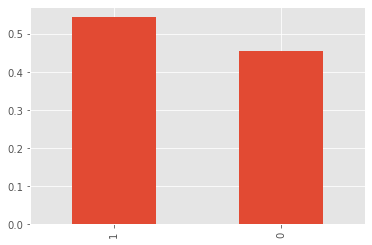

In [23]:
df_raw = pd.read_csv('DILI/final/DILI_GSD.csv') # Need to input Binary class Data
df_raw

df_raw.DILI.value_counts(normalize=True).plot(kind='bar')
print(df_raw.DILI.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
Binclude_processing(X,y, 'DILI')

---------Basic---------
[Logistic Regression]
Cost Function: 1
Cost Function: 2
Cost Function: 4
Cost Function: 8
Cost Function: 16
Cost Function: 32
Cost Function: 64
Cost Function: 128
[LGBM Classifier]
Learning Rate: 0.1
Tree: 100
Learning Rate: 0.1
Tree: 200
Learning Rate: 0.1
Tree: 300
Learning Rate: 0.1
Tree: 400
Learning Rate: 0.1
Tree: 500
Learning Rate: 0.1
Tree: 600
Learning Rate: 0.1
Tree: 700
Learning Rate: 0.1
Tree: 800
Learning Rate: 0.1
Tree: 900
Learning Rate: 0.1
Tree: 1000
Learning Rate: 0.05
Tree: 100
Learning Rate: 0.05
Tree: 200
Learning Rate: 0.05
Tree: 300
Learning Rate: 0.05
Tree: 400
Learning Rate: 0.05
Tree: 500
Learning Rate: 0.05
Tree: 600
Learning Rate: 0.05
Tree: 700
Learning Rate: 0.05
Tree: 800
Learning Rate: 0.05
Tree: 900
Learning Rate: 0.05
Tree: 1000
Learning Rate: 0.01
Tree: 100
Learning Rate: 0.01
Tree: 200
Learning Rate: 0.01
Tree: 300
Learning Rate: 0.01
Tree: 400
Learning Rate: 0.01
Tree: 500
Learning Rate: 0.01
Tree: 600
Learning Rate: 0.01
Tre

## AMES Mutagenicity

In [47]:
df_raw = pd.read_csv('AMES Mutagenesis/final/AMES_GSD.csv') # Need to input Binary class Data
categorical_features = ['fr_Al_OH_noTert','fr_COO','fr_NH2','fr_N_O','fr_Ndealkylation2','fr_Nhpyrrole','fr_alkyl_halide','fr_allylic_oxid','fr_lactam']
for var in categorical_features:
    df_raw[var] = df_raw[var].astype("category")
df_raw['Mutagenicity'] = df_raw['Mutagenicity'].astype('category')

# df_raw.Mutagenicity.value_counts(normalize=True).plot(kind='bar')
# print(df_raw.Mutagenicity.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]
y = y.astype('category')

In [43]:
Binclude_processing(X,y,'AMES')

---------SMOTEonly---------
[Logistic Regression]
Cost Function: 1


ValueError: Found input variables with inconsistent numbers of samples: [9117, 9656]

## hERG

1    58.355514
0    41.644486
Name: hERG, dtype: float64


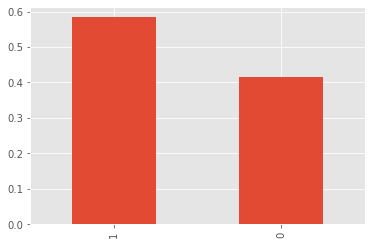

In [48]:
df_raw = pd.read_csv('hERG/final/hERG_GSD.csv') # Need to input Binary class Data
df_raw.hERG.value_counts(normalize=True).plot(kind='bar')
print(df_raw.hERG.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
Binclude_processing(X,y, 'hERG')

---------Basic---------
[Logistic Regression]
Cost Function: 1
Cost Function: 2
Cost Function: 4
Cost Function: 8
Cost Function: 16
Cost Function: 32
Cost Function: 64
Cost Function: 128
[LGBM Classifier]
Learning Rate: 0.1
Tree: 100
Learning Rate: 0.1
Tree: 200
Learning Rate: 0.1
Tree: 300
Learning Rate: 0.1
Tree: 400
Learning Rate: 0.1
Tree: 500
Learning Rate: 0.1
Tree: 600
Learning Rate: 0.1
Tree: 700
Learning Rate: 0.1
Tree: 800
Learning Rate: 0.1
Tree: 900
Learning Rate: 0.1
Tree: 1000
Learning Rate: 0.05
Tree: 100
Learning Rate: 0.05
Tree: 200
Learning Rate: 0.05
Tree: 300
Learning Rate: 0.05
Tree: 400
Learning Rate: 0.05
Tree: 500
Learning Rate: 0.05
Tree: 600
Learning Rate: 0.05
Tree: 700
Learning Rate: 0.05
Tree: 800
Learning Rate: 0.05
Tree: 900
Learning Rate: 0.05
Tree: 1000
Learning Rate: 0.01
Tree: 100
Learning Rate: 0.01
Tree: 200
Learning Rate: 0.01
Tree: 300
Learning Rate: 0.01
Tree: 400
Learning Rate: 0.01
Tree: 500
Learning Rate: 0.01
Tree: 600
Learning Rate: 0.01
Tre

# Multi-Class Classification

## EPA

3    49.906335
2    22.411444
4    19.337534
1     8.344687
Name: EPA_category, dtype: float64


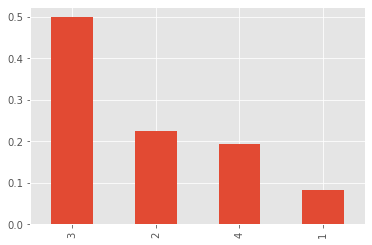

In [65]:
df_raw = pd.read_csv('Acute Oral Toxicity/final/AOT_EPA_GSD.csv')


df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]
y = y.astype('int').astype('category')

y.value_counts(normalize=True).plot(kind='bar')
print(y.value_counts(normalize=True)*100)

In [66]:
Minclude_processing(X,y, 'EPA')

---------MinMax---------
[RandomForest]
Tree: 100
Tree: 200
Tree: 300
Tree: 400
Tree: 500
Tree: 600
Tree: 700
Tree: 800
Tree: 900
Tree: 1000
[k-NN]
k: 3
k: 5
k: 7


## GHS

5    42.944059
4    35.279703
3    13.495014
2     6.354572
1     1.926652
Name: GHS_category, dtype: float64


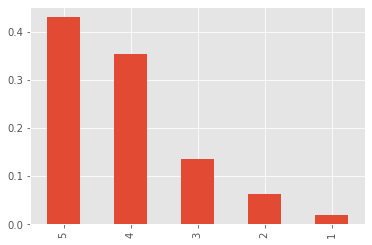

In [48]:
df_raw = pd.read_csv('Acute Oral Toxicity/final/AOT_GHS_GSD.csv')


df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]
y = y.astype('int').astype('category')

y.value_counts(normalize=True).plot(kind='bar')
print(y.value_counts(normalize=True)*100)

In [49]:
Minclude_processing(X,y, 'GHS')

---------Basic---------
[Logistic Regression]
Cost Function: 1
Cost Function: 2
Cost Function: 4
Cost Function: 8
Cost Function: 16
Cost Function: 32
Cost Function: 64
Cost Function: 128
[LGBM Classifier]
Learning Rate: 0.1
Tree: 100
Learning Rate: 0.1
Tree: 200
Learning Rate: 0.1
Tree: 300
Learning Rate: 0.1
Tree: 400
Learning Rate: 0.1
Tree: 500
Learning Rate: 0.1
Tree: 600
Learning Rate: 0.1
Tree: 700
Learning Rate: 0.1
Tree: 800
Learning Rate: 0.1
Tree: 900
Learning Rate: 0.1
Tree: 1000
Learning Rate: 0.05
Tree: 100
Learning Rate: 0.05
Tree: 200
Learning Rate: 0.05
Tree: 300
Learning Rate: 0.05
Tree: 400
Learning Rate: 0.05
Tree: 500
Learning Rate: 0.05
Tree: 600
Learning Rate: 0.05
Tree: 700
Learning Rate: 0.05
Tree: 800
Learning Rate: 0.05
Tree: 900
Learning Rate: 0.05
Tree: 1000
Learning Rate: 0.01
Tree: 100
Learning Rate: 0.01
Tree: 200
Learning Rate: 0.01
Tree: 300
Learning Rate: 0.01
Tree: 400
Learning Rate: 0.01
Tree: 500
Learning Rate: 0.01
Tree: 600
Learning Rate: 0.01
Tre

# Regression

## LD50

In [71]:
df_raw = pd.read_csv('Acute Oral Toxicity/final/AOT_LD50_GSD.csv')
# df_raw

df = df_raw.iloc[:, 3:]
# df
X = df.iloc[:,1:]
y = df.iloc[:,0]


In [74]:
Rinclude_processing(X,y, 'LD50_minLog')

---------Basic---------
[RandomForest]
Tree: 100


ValueError: continuous is not supported